In [1]:
import numpy as np
import matplotlib.pyplot as plt
import definitions as fhn

In [7]:
n,r,sigma,eps,phi,a= 1000,0.35,0.1,0.05,np.pi/2-0.1,0.5

In [6]:
initial_state=np.empty(2*n)
initial_state[0::2]=2
initial_state[1::2]=-1

In [7]:
sol1=fhn.FHN_ring_solver(n=n,r=r,sigma=sigma,initial_state=initial_state)

In [27]:
sigma=0.001
r=0.1
phi=0
sol2=fhn.FHN_ring_solver(n=n,r=r,sigma=sigma,phi=phi)

In [9]:
np.savez_compressed("runFHN_sync.npz", sol_initial_sync=sol1, sol_phi_zero=sol2)

In [2]:
loaded_arrays=np.load("runFHN_sync.npz")

In [3]:
sol_initial_sync=fhn.FHN_sol_class(loaded_arrays["sol_initial_sync"])
sol_phi_zero=fhn.FHN_sol_class(loaded_arrays["sol_phi_zero"])

In [10]:
import sys
sys.getsizeof(sol_initial_sync.sol_array)

128

In [8]:
sol_initial_sync.r=r
sol_initial_sync.sigma=sigma
sol_initial_sync.mean_phase_velocity_calculator()
sol_initial_sync.a=a
sol_phi_zero.r=r
sol_phi_zero.sigma=sigma
sol_phi_zero.mean_phase_velocity_calculator()
sol_phi_zero.a=a

In [21]:
phi=np.pi/2-0.1
str1=f"n={n}, r={r}, sigma={sigma}, eps={eps}, phi={phi:.2f}, a={a}"
phi=0
str2=f"n={n}, r={r}, sigma={sigma}, eps={eps}, phi={phi:.2f}, a={a}"

In [22]:
sol_initial_sync.parameters_get(str1)
sol_phi_zero.parameters_get(str2)


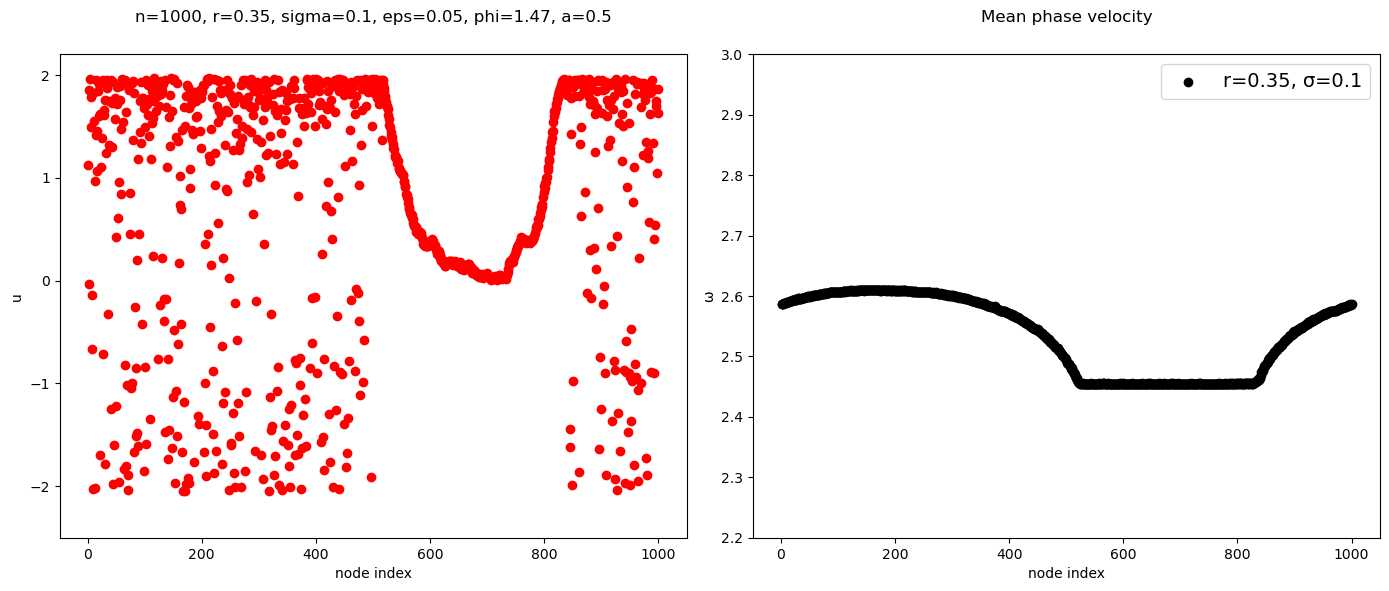

In [23]:
sol_initial_sync.phase_frequency_subplot()

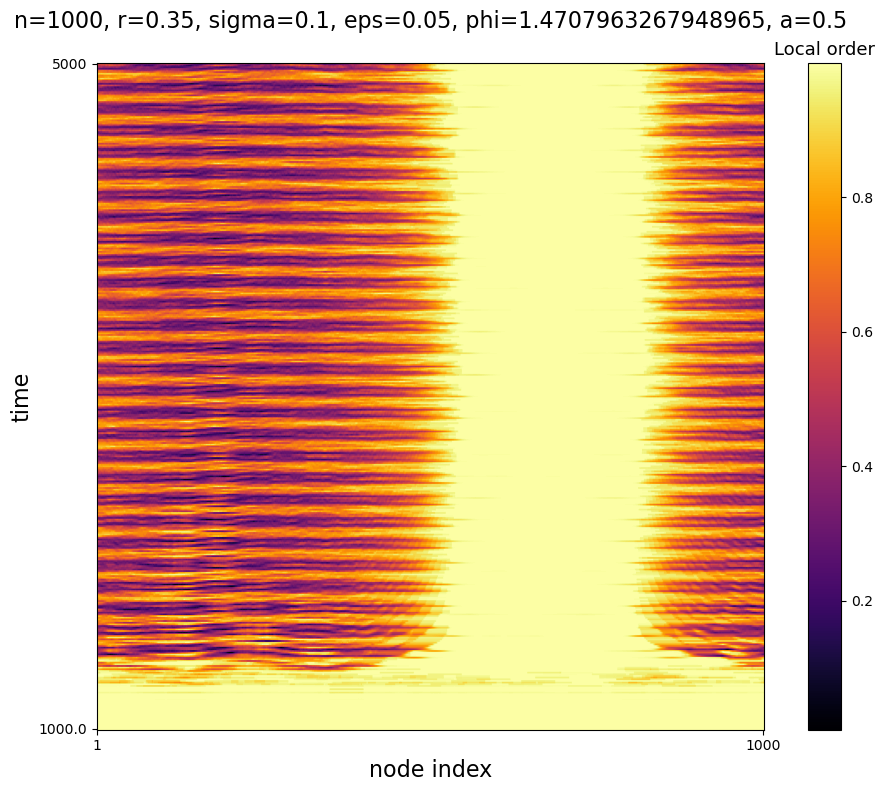

In [14]:
sol_initial_sync.LOP_matrix_show()

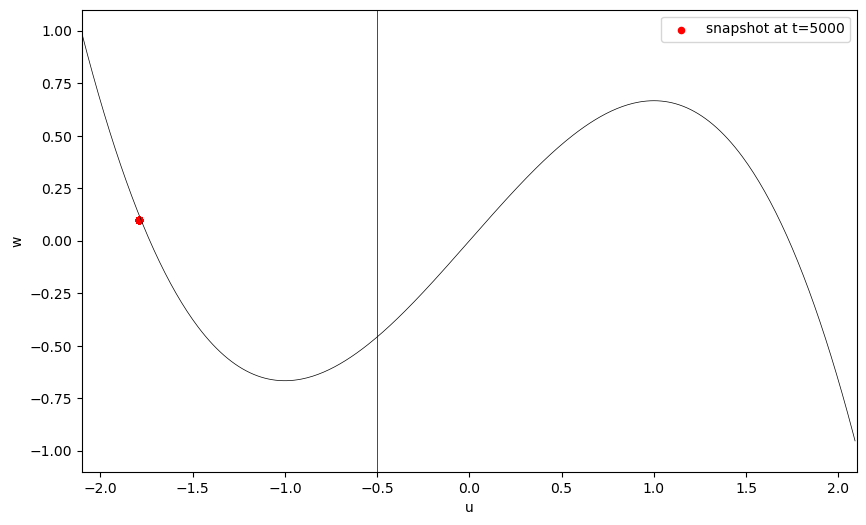

In [26]:
sol_phi_zero.u_v_plot()

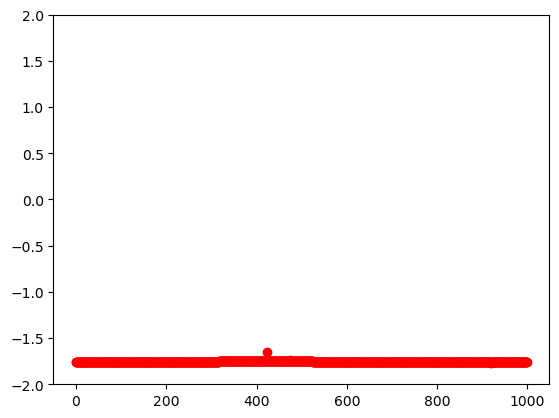

In [40]:
plt.figure()
plt.scatter(range(n),sol2[30000,0::2],c="red")
plt.ylim(-2,2)
plt.show()

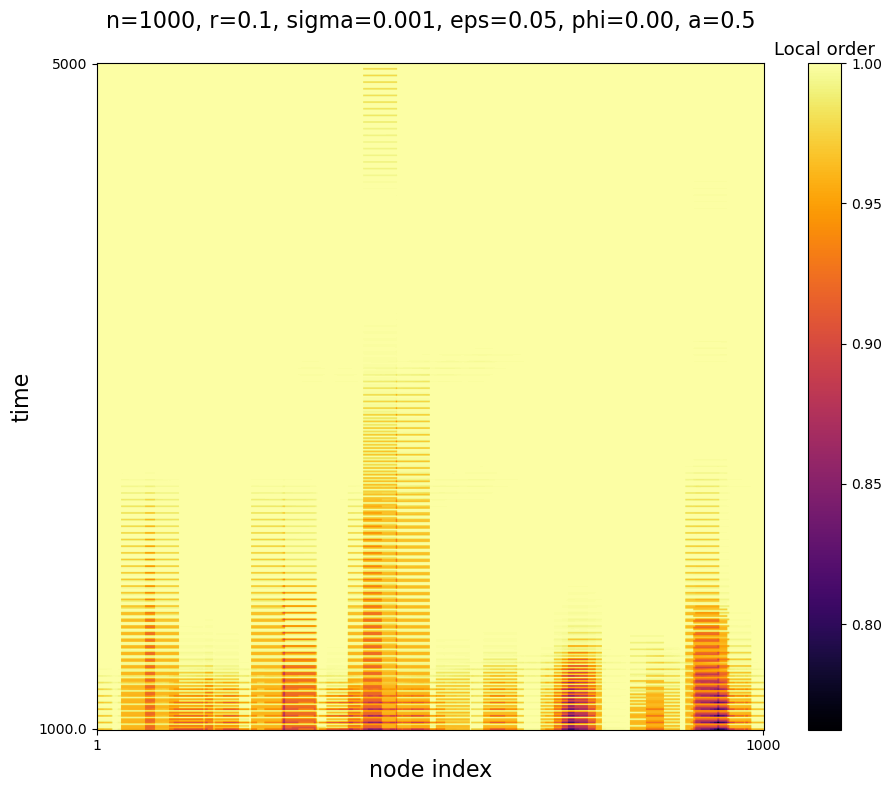

In [41]:
sol_weak=fhn.FHN_sol_class(sol2)
sol_weak.r=r
sol_weak.sigma=sigma
sol_weak.mean_phase_velocity_calculator()
sol_weak.a=a
str3=f"n={n}, r={r}, sigma={sigma}, eps={eps}, phi={phi:.2f}, a={a}"
sol_weak.parameters_get(str3)
sol_weak.LOP_matrix_show()